In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customer_details = pd.read_csv('Customer Details.csv',encoding='windows-1252')

In [6]:
card_deatils = pd.read_csv('Card Details.csv')

In [8]:
df = customer_details.merge(card_deatils,on='CustomerID')

In [10]:
df.sample()

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
27741,Kent Para,6549-BTYPG,51,Married,Male,Caucasian,Doctorate,44.328,4559,339,3,69


# Identify potential features that could influence the credit card limit, such as income, age, credit score, employment status, education level, and previous credit history.

C:\Users\HP\AppData\Local\Temp\ipykernel_12128\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


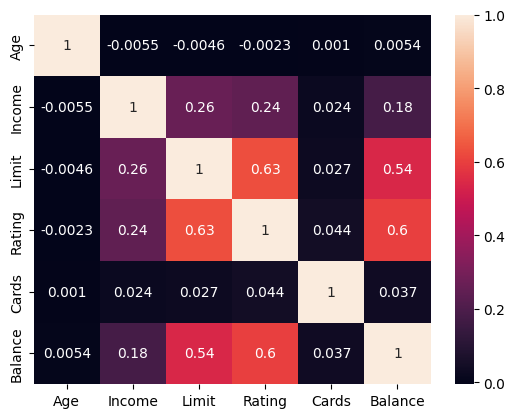

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Based on the above information, several potential features could influence the credit card limit. These features include:

Income: Higher income levels generally indicate a greater capacity to repay debts, which could lead to a higher credit card limit.

Rating: A higher credit score indicates a better creditworthiness, which can positively impact the credit card limit.

Balance: Higher bank balance of the individual indicates a better creditworthiness, which could lead to a higher credit card limit.

These features are often considered by financial institutions when determining credit limits, as they provide insights into an individual's financial stability, capacity to repay debts, and creditworthiness.

It's important to note that the actual influence of these features on credit card limits can vary based on individual circumstances and the policies of the credit card issuer. Additionally, there may be other factors not listed here that could also impact the credit card limit determination.

# Perform data preprocessing steps, including handling missing values, encoding categorical variables, and scaling numerical features.

Checking for null values.

In [12]:
df.isnull().sum()

Name              0
CustomerID        0
Age               0
Marital Status    0
Gender            0
Ethnicity         0
Education         0
Income            0
Limit             0
Rating            0
Cards             0
Balance           0
dtype: int64

Checking for duplicate values.

In [13]:
df.duplicated().sum()

0

Converting categorical columns into numerical values by using lable encoder.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [19]:
labelEncoder = LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Marital Status'] = labelEncoder.fit_transform(df['Marital Status'])
df['Ethnicity'] = labelEncoder.fit_transform(df['Ethnicity'])
df['Education'] = labelEncoder.fit_transform(df['Education'])

In [20]:
df

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
0,Katherine Bettcher,0002-ORFBO,30,1,1,2,4,105.038,9142,734,3,232
1,Alejandro Graham,0002-ORFBOA,71,1,1,1,0,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,2,1,0,7,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,1,0,2,7,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,1,1,0,1,56.375,2850,258,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,Oletta,9992-UJOELH,34,3,1,2,0,32.930,4222,308,4,162
32543,Leesa Hugo,9993-LHIEB,61,1,0,2,6,12.469,5645,311,2,487
32544,Oliva,9993-LHIEBH,64,3,1,2,7,64.167,3116,285,3,576
32545,Hank Hunter,9995-HOTOH,77,3,0,2,0,20.970,1356,161,2,0
